## 1- Data pre-processing

In [3]:
# Libraries at this stage 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [46]:
df = pd.read_csv('vehicle.csv')

In [47]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [48]:
df.shape

(846, 19)

In [49]:
df.info()

# Remarks:
# 1- Some columns having few empty values

# 2- Class column is of 'object' Type.
#    And it is to be dropped for later as it's the classification that we want to guess.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [52]:
X= df.drop('class', axis=1)
X.shape

(846, 18)

In [53]:
# How many are missing :
X.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

In [55]:
# Replacing missing values wiht repsective column medians
X = X.apply(lambda x: x.fillna(x.median()),axis=0)

In [56]:
# Checking all 'nan' values are gone.
X.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [57]:
# Some One variable Analysis to check for outliers and skeweness
# 1- First numerical 
# 2- Boxplots 

In [72]:
X.describe()
# Columns where mean is obviously > or < than median are mostly : 
#  "scatter_ratio" , "scaled_variance.1"

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        846.000000     846.000000  
mean         188.918440     195.632388  
std            6.152247       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

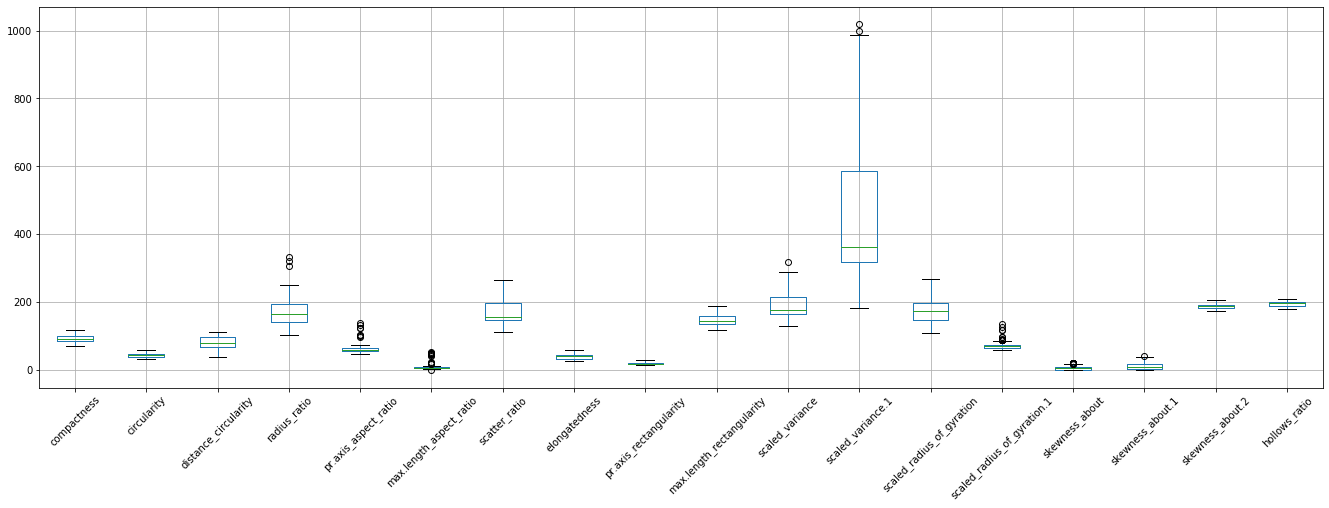

In [70]:
X.boxplot(figsize=(23,7), rot= 45)

# Outliers are obvious in 6 to 7 columns.
# The need of rescaling with Zcores is also obvious 

In [75]:
# libray for Scaling 
from scipy.stats import zscore

X_scaled = X.apply(zscore)

In [76]:
X_scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

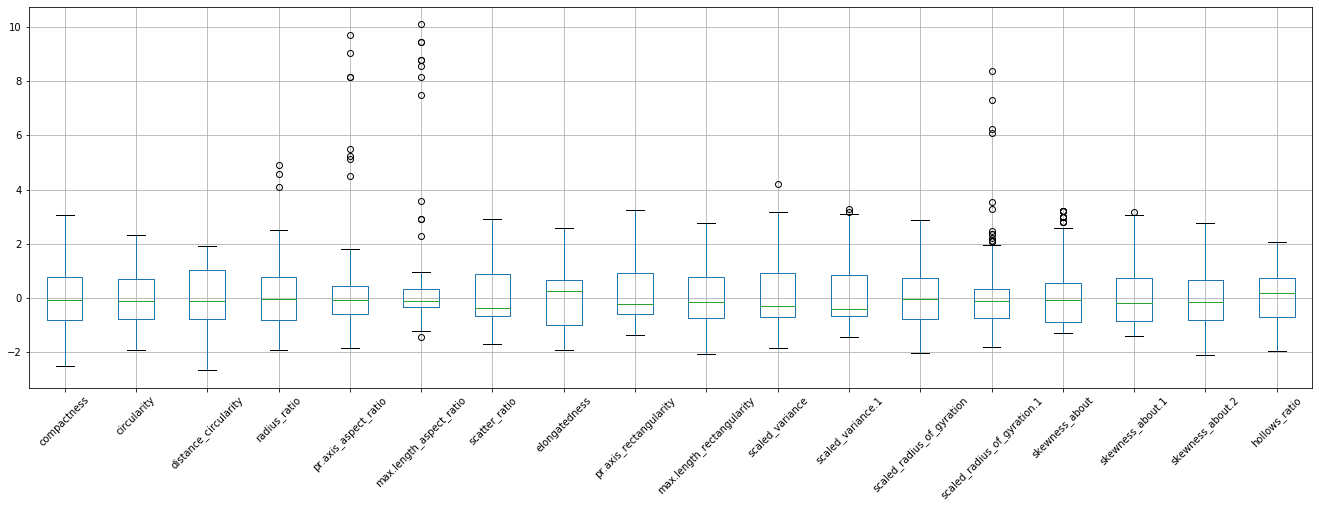

In [79]:
X_scaled.boxplot(figsize=(23,7), rot= 45)

# Even after re-scaling the Outliers are too obvious 

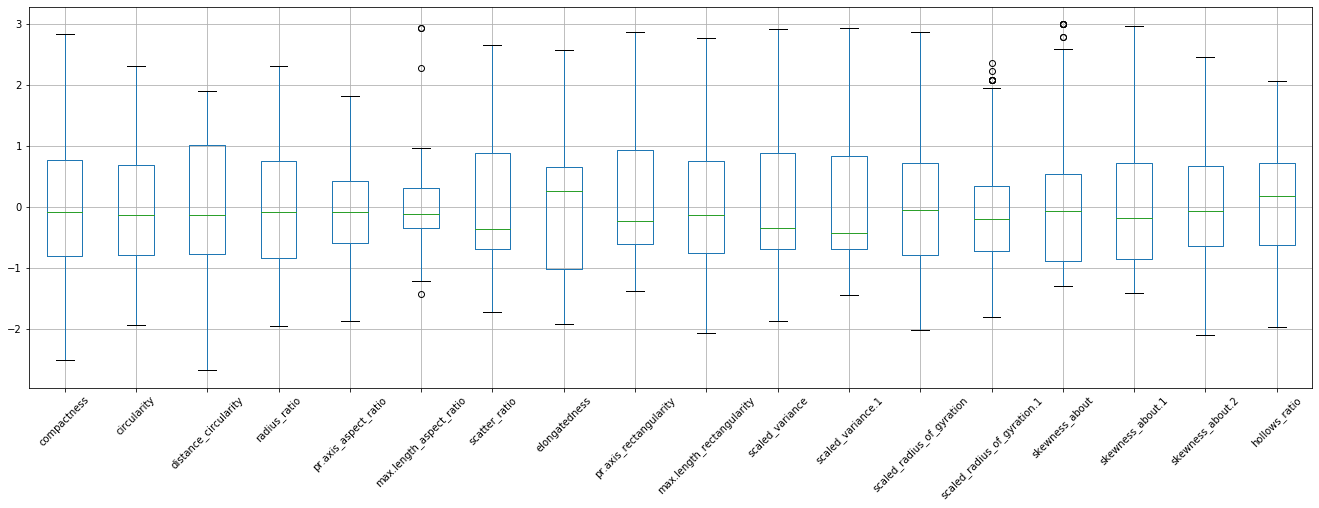

In [81]:
# removing Zscores that are in absolute value:  > 3
abs_z_scores = np.abs( X_scaled )


# Oultiers are treated and imputed from the X_scaled. 
filtered_entries = (abs_z_scores < 3).all(axis=1)
X_scaled_new = X_scaled [filtered_entries]



# Now we will work with X_scaled_new
X_scaled_new.boxplot(figsize=(23,7), rot= 45)


## 2- Undrstanding the attributes and their relationships 

In [83]:
# Note: The new DF is somehow slighlty reduced 
X_scaled_new.shape

(824, 18)

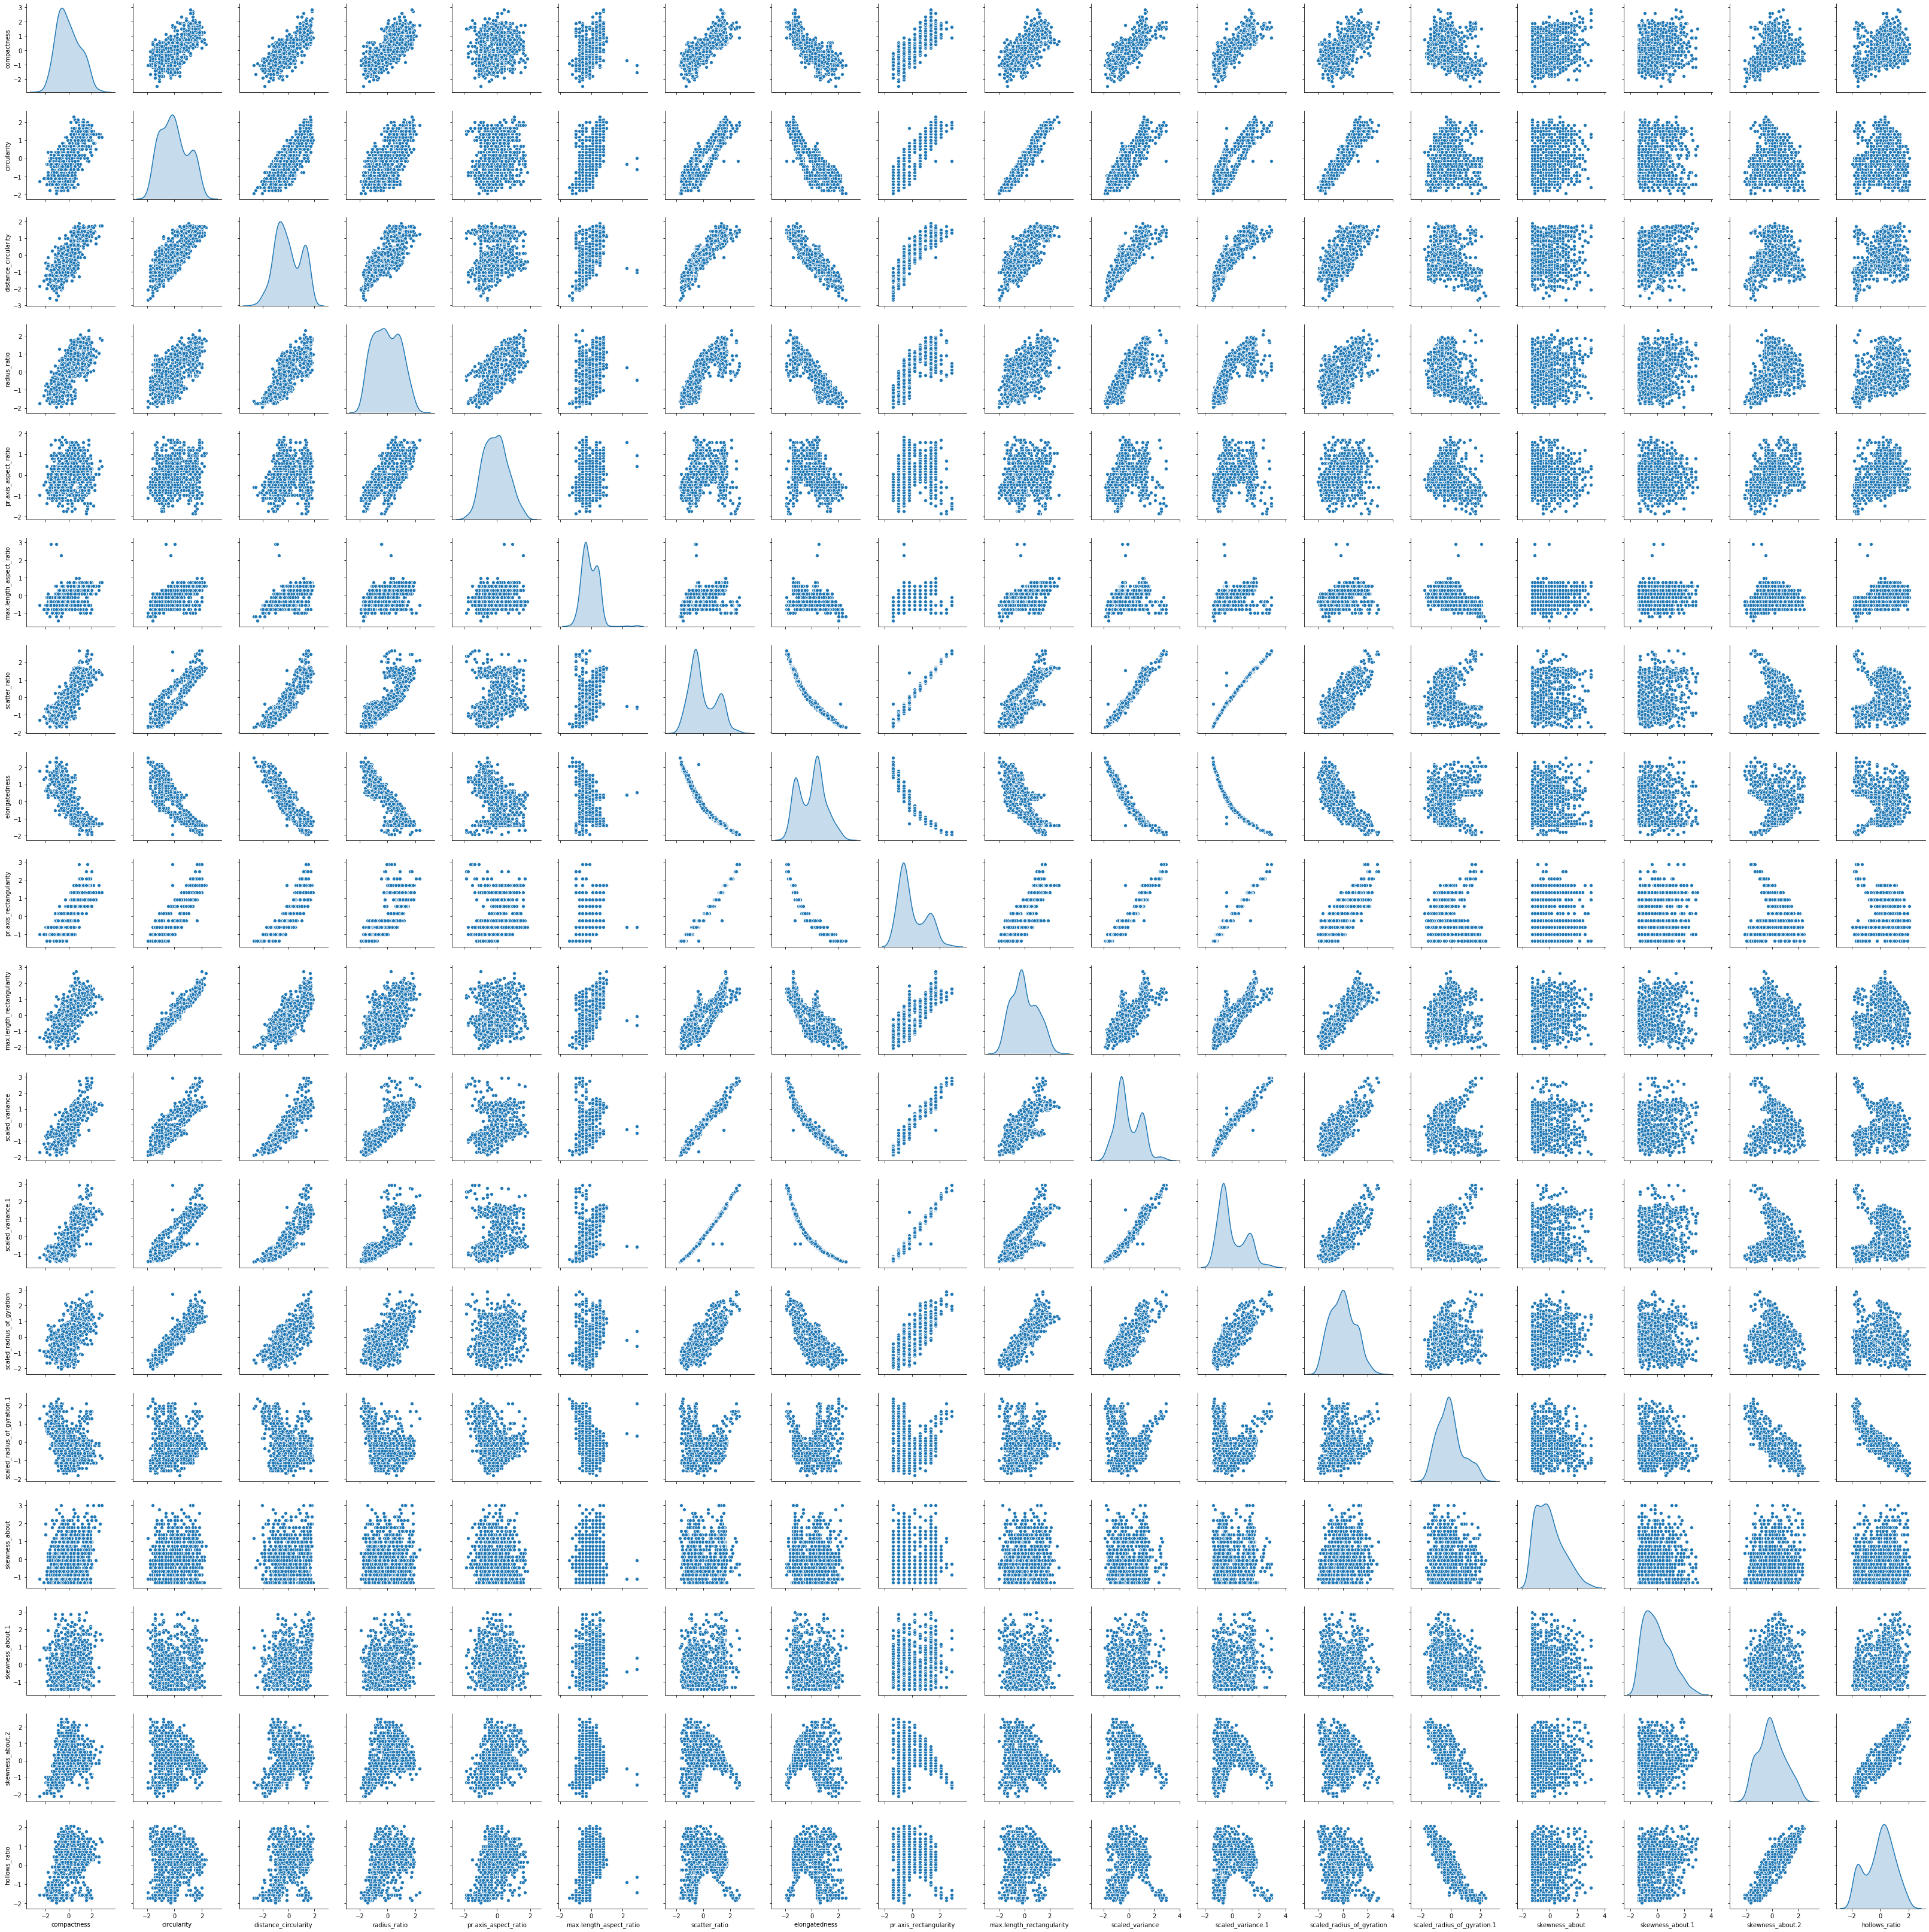

In [85]:
# Pairplots 
sns.pairplot(X_scaled_new, diag_kind='kde')

# WOW !!  MANY STRONG CORRELATIONS !

# we will resort to correlation matirx or Heatmap to help give us insight which columns to keep later.
# Eventually the PCA analysis will conform this later.

In [93]:
# Obviously , strong correlations show redundancy in information 

X_scaled_new.corr() [ np.abs(X_scaled_new.corr()) > 0.9 ]

# All redundant attributes will be filtered out in the PCA analysis whether positively or negatively correlated

# scatter_ratio 
# elongatedness 
# pr.axis_rectangularity 
# scaled_variance 
# scaled_variance.1 


# These have some of the strongest in between correlations

compactness  circularity  distance_circularity  \
compactness                          1.0          NaN                   NaN   
circularity                          NaN     1.000000                   NaN   
distance_circularity                 NaN          NaN              1.000000   
radius_ratio                         NaN          NaN                   NaN   
pr.axis_aspect_ratio                 NaN          NaN                   NaN   
max.length_aspect_ratio              NaN          NaN                   NaN   
scatter_ratio                        NaN          NaN              0.907589   
elongatedness                        NaN          NaN             -0.910044   
pr.axis_rectangularity               NaN          NaN                   NaN   
max.length_rectangularity            NaN     0.963278                   NaN   
scaled_variance                      NaN          NaN                   NaN   
scaled_variance.1                    NaN          NaN                   NaN   
scaled_radius_of_gyration            NaN     0.928799                   NaN   
scaled_radius_of_gyration.1          NaN          NaN                   NaN   
skewness_about                       NaN          NaN                   NaN   
skewness_about.1                     NaN          NaN                   NaN   
skewness_about.2                     NaN          NaN                   NaN   
hollows_ratio                        NaN          NaN                   NaN   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                           NaN                   NaN   
circularity                           NaN                   NaN   
distance_circularity                  NaN                   NaN   
radius_ratio                          1.0                   NaN   
pr.axis_aspect_ratio                  NaN                   1.0   
max.length_aspect_ratio               NaN                   NaN   
scatter_ratio                         NaN                   NaN   
elongatedness                         NaN                   NaN   
pr.axis_rectangularity                NaN                   NaN   
max.length_rectangularity             NaN                   NaN   
scaled_variance                       NaN                   NaN   
scaled_variance.1                     NaN                   NaN   
scaled_radius_of_gyration             NaN                   NaN   
scaled_radius_of_gyration.1           NaN                   NaN   
skewness_about                        NaN                   NaN   
skewness_about.1                      NaN                   NaN   
skewness_about.2                      NaN                   NaN   
hollows_ratio                         NaN                   NaN   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                      NaN            NaN   
circularity                                      NaN            NaN   
distance_circularity                             NaN       0.907589   
radius_ratio                                     NaN            NaN   
pr.axis_aspect_ratio                             NaN            NaN   
max.length_aspect_ratio                          1.0            NaN   
scatter_ratio                                    NaN       1.000000   
elongatedness                                    NaN      -0.973064   
pr.axis_rectangularity                           NaN       0.989258   
max.length_rectangularity                        NaN            NaN   
scaled_variance                                  NaN       0.977432   
scaled_variance.1                                NaN       0.993015   
scaled_radius_of_gyration                        NaN            NaN   
scaled_radius_of_gyration.1                      NaN            NaN   
skewness_about                                   NaN            NaN   
skewness_about.1                                 NaN            NaN   
skewness_about.2                              

## 3- PCA analysis 

In [102]:
# Library for PCA analysis 
from sklearn.decomposition import PCA 


In [103]:
pca= PCA( n_components = 12 )
pca.fit( X_scaled_new)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [104]:
print(pca.explained_variance_ratio_)

[0.57469539 0.18245093 0.07238276 0.05878621 0.03281173 0.02905451
 0.01410259 0.01292439 0.00628434 0.00410742 0.00359083 0.00269306]


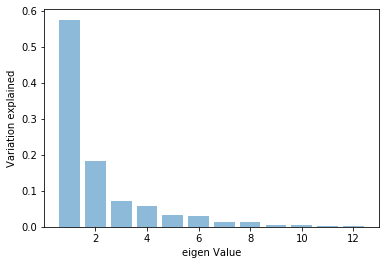

In [106]:
plt.bar(list(range(1,13)),pca.explained_variance_ratio_,alpha=0.5, align='center')

plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

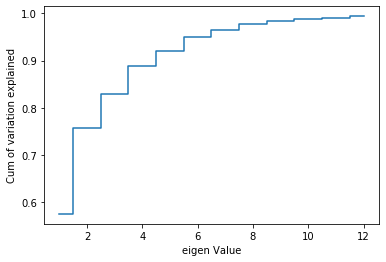

In [105]:
plt.step(list(range(1,13)),np.cumsum(pca.explained_variance_ratio_), where='mid')

plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()



In [109]:
# Conclusion : 6 dimensions are enough to explain  more than 95% of the variance
pca6 = PCA(n_components = 6)
pca6.fit(X_scaled_new)


PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [110]:
print(pca6.components_)


[[ 0.27647045  0.29454621  0.30954512  0.26967135  0.0748445   0.08885069
   0.3159545  -0.31783111  0.311529    0.28401254  0.30106235  0.31079631
   0.26681364 -0.04631405  0.03949501  0.06028211  0.04480026  0.09189183]
 [-0.11361831  0.1477578  -0.05560711 -0.20258096 -0.1725728  -0.0320607
   0.06201466 -0.00306016  0.07361507  0.13823429  0.05460162  0.0646917
   0.22285712  0.45055006 -0.03613015 -0.11961479 -0.54692134 -0.53607083]
 [ 0.06931261  0.19195056 -0.07705907 -0.03348522  0.05306574  0.02660765
  -0.09931078  0.08300266 -0.09658874  0.19015903 -0.12041324 -0.0943894
   0.20555582 -0.07298908  0.57420351 -0.6837368   0.1184283   0.0574915 ]
 [ 0.13323381 -0.06696128  0.06621699 -0.16201381 -0.3085872   0.02136825
   0.0148496   0.0581957   0.0369879  -0.0386027  -0.02353303  0.01587967
  -0.0537869   0.00994694  0.73234426  0.54791714 -0.06615421 -0.01636976]
 [ 0.06284371 -0.27191007 -0.13132679  0.32019355  0.3943687  -0.33054919
   0.09957109 -0.14707534  0.07464697

In [111]:
print(pca6.explained_variance_ratio_)

[0.57469539 0.18245093 0.07238276 0.05878621 0.03281173 0.02905451]


In [112]:
# 95% Variaiton explained by 6 dimensions!

pca6.explained_variance_ratio_.sum()

0.9501815349202548

In [115]:
Xpca6 = pd.DataFrame(pca6.transform(X_scaled_new))

In [116]:
Xpca6

0         1         2         3         4         5
0    0.409252 -0.241909  0.208203 -0.330393 -0.380424 -1.559948
1   -1.501781 -0.408475  0.203274  0.838261 -0.543424  0.139211
2    3.822322  0.329409  1.162095  0.655553  0.900278 -0.231955
3   -1.570803 -2.850830  0.428992 -0.229171 -0.635205  0.306427
4    5.742567  3.955068 -0.864786  0.264724  1.107116  2.415919
..        ...       ...       ...       ...       ...       ...
819 -0.369052 -0.645062 -1.474835  0.828902  0.992371 -0.333933
820 -0.243670  0.127549 -0.874079 -0.556655 -1.167005 -1.274294
821  4.881448  0.128462  0.340925 -1.407333 -0.213501  0.251518
822 -3.181051 -1.075074 -1.916187  0.123877 -0.444600 -0.083897
823 -4.692243  0.241078 -1.225611  0.107371 -0.462515  0.232877

[824 rows x 6 columns]

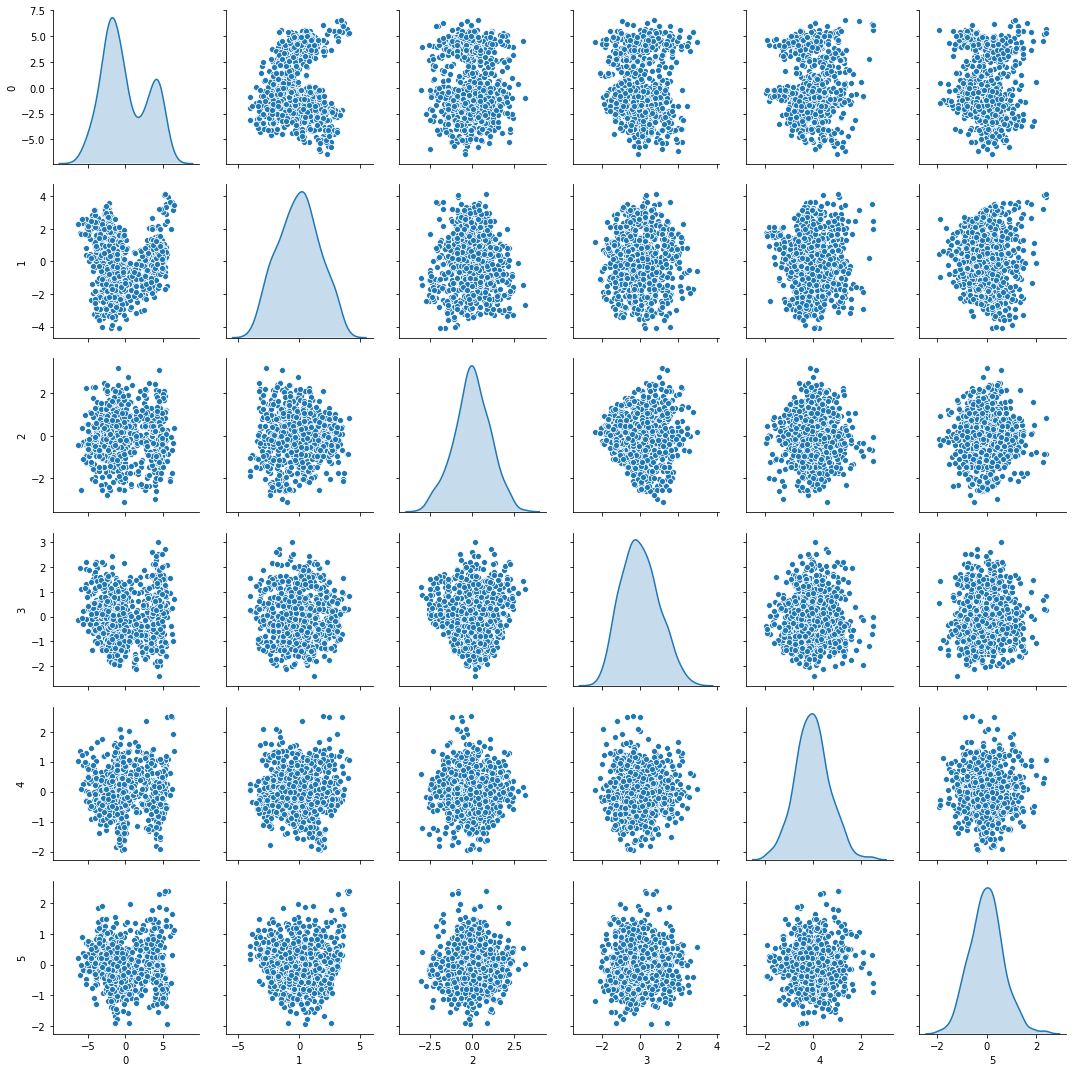

In [118]:
sns.pairplot(Xpca6, diag_kind='kde')

## 4- SVM was NOT covered in the program - Centroid based clustering Method Attempted

In [125]:
#Original Data Classes: 

df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [133]:
# Let's See if the reduced Input matrix Xpca6 can infer similar number of vehicule groups or clusters 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

clusters = range( 1 , 10 ) 
meanDistortions = []

for k in clusters:
    model = KMeans( n_clusters= k)
    model.fit(Xpca6)
    prediction = model.predict(Xpca6)
    meanDistortions.append( sum (np.min(cdist(Xpca6, model.cluster_centers_,'euclidean'), axis =1)) / Xpca6.shape[0])
                           
    
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title(' Selecting K with the Elbow Method')








Text(0.5, 1.0, ' Selecting K with the Elbow Method')

In [134]:
# Yes ! PCA reduced input-matrix 'Xpca6' obviously points out that 3 clusters are the optimal way the data can be sorted in.

In [136]:
# We could see the bend at 3, so let us create 3 custers with 5 iterations

kmeans = KMeans(n_clusters=3, n_init = 5, random_state=12345)
kmeans.fit(Xpca6)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=12345, tol=0.0001, verbose=0)

In [139]:
# Check the number of data in each cluster - Does it match close enough the intitial counts  ?
# car    429
# bus    218
# van    199

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[259 236 329]


In [ ]:
# Unfortunaltely no  

In [152]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(X_scaled_new) )
centroid_df.transpose()

# Group 0 : seems to have the smallest measures--> possible CAR 
# Group 1 : seems to have the biggest measures --> possible BUS
# Group 2 : seems to have the central measures --> possible VAN 

0         1         2
compactness                 -0.928640  1.129106 -0.233494
circularity                 -0.522849  1.161538 -0.571535
distance_circularity        -0.897043  1.186367 -0.305625
radius_ratio                -1.067226  1.010274 -0.027862
pr.axis_aspect_ratio        -0.500457  0.205244  0.211654
max.length_aspect_ratio     -0.215084  0.333928 -0.114684
scatter_ratio               -0.776997  1.268505 -0.466342
elongatedness                0.867225 -1.190275  0.331740
pr.axis_rectangularity      -0.745943  1.267832 -0.489570
max.length_rectangularity   -0.490747  1.093869 -0.539496
scaled_variance             -0.782616  1.213917 -0.416351
scaled_variance.1           -0.780420  1.270951 -0.465767
scaled_radius_of_gyration   -0.389297  1.079050 -0.604820
scaled_radius_of_gyration.1  0.832140 -0.011608 -0.627832
skewness_about              -0.106593  0.167768 -0.058742
skewness_about.1            -0.294497  0.247827  0.018218
skewness_about.2            -1.055968 -0.002281  0.810944
hollows_ratio               -1.101719  0.166649  0.704614

In conclusion , 
the last part may have had to be done with SVM which wasn't covered in our series of lectures until now and maybe will be in the future.

However , by the end of the project  I can see that the  unsupervised KMEANS model , althought with a reduced input Xpca6 , managed to confirm the presence of 3 clusters that were originally in the vehcicule types. 

The numbers do not match as it seems that perhaps some CARS and BUSES were oput into the central VAN cluster.
Further study could been done.

Edouard Toutounji - April 3 2020